# Sanofi Paul Ricard
This notebook is being used to generate a nice image of cars around the Paul Ricard ciruit.

In [11]:
# import libraries
import plotly.graph_objects as go
import pandas as pd
import fastf1 as ff1
import numpy as np

In [12]:
df = pd.read_csv('C:/Users/mark_/Documents/McLaren2021/Sanofi/Race Dashboard data/leaderboard.csv')
df.head()


,Unnamed: 0,Line,2021-04-15 00:00:00,2021-05-13 00:00:00,2021-06-10 00:00:00,2021-07-08 00:00:00,2021-08-19 00:00:00,2021-09-16 00:00:00,race_time,prev_race_time,Plant,position,gap_to_leader,prev_position,Gain/Loss,interval,OEE Start point,McL_Start_OEE,⇗ OEE% progress,OEE% Target (2022)
0,0,SCO - IMA C80/2,88.905062,79.456522,82.482693,64.674113,75.994197,71.738796,463.251383,391.512587,SCOPPITO,1,0.000000,2,1,NaN,0.451031,0.443285,0.2030358338564567,0.650
1,1,SCO - GAMMA1,89.148373,79.525767,79.076756,64.979194,76.634297,85.330701,474.695089,389.364388,SCOPPITO,2,11.443706,1,-1,11.443706,0.418683,0.413847,0.06440587540231096,0.650
2,2,MAF - C9 Packaging Line,88.907463,89.747841,90.361488,72.580804,72.783181,74.841302,489.222079,414.380777,Maisons-Alfort,3,25.970696,4,1,14.526990,0.419899,0.319749,0.1205226198743584,0.530
3,3,FRA - AL6,89.132657,90.323044,87.005598,75.552144,70.466626,81.608276,494.088344,412.480068,Frankfurt,4,30.836961,3,-1,4.866265,0.332657,NaN,0.04413991180668764,0.485
4,4,FRA - AL5 Packaging 1,89.105096,89.725754,90.495004,75.207724,71.378720,85.652674,501.564972,415.912298,Frankfurt,5,38.313589,5,0,7.476628,0.479693,NaN,-0.06171574043711254,0.500


In [13]:
cars = df[['Line', '2021-09-16 00:00:00']]

In [14]:
cars.sort_values(cars.columns[1], inplace=True)
cars['lap_position'] = np.arange(1,len(cars) + 1)
cars

C:\Users\mark_\anaconda3\envs\race_dash\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-14-2bef5f5a4ac3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['lap_position'] = np.arange(1,len(cars) + 1)


,Line,2021-09-16 00:00:00,lap_position
5,MAF - C2 Packaging Line,67.891493,1
0,SCO - IMA C80/2,71.738796,2
8,SUZ - LINE 01 - UHLMANN 1880,73.127166,3
2,MAF - C9 Packaging Line,74.841302,4
3,FRA - AL6,81.608276,5
1,SCO - GAMMA1,85.330701,6
6,TRS - L18 Packaging Line,85.416677,7
4,FRA - AL5 Packaging 1,85.652674,8
10,TRS - L25 Packaging Line,85.685159,9
14,SUZ - MEDISEAL PURAN,85.846301,10


In [15]:
# ff1.Cache.enable_cache('f1_cache')
GrandPrix = 'Russia'
ff1.Cache.enable_cache('C:/Users/mark_/Documents/McLaren2021/Sanofi/f1_cache')
laps = ff1.get_session(2020, GrandPrix, 'Q').load_laps(with_telemetry=True)
tel = laps.pick_driver('NOR').pick_fastest().telemetry

core           INFO 	Loading laps for Russian Grand Prix - Qualifying [v2.1.7]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['4', '33', '10', '99', '31', '8', '63', '44', '3', '7', '6', '77', '20', '5', '18', '55', '26', '23', '16', '11']


In [16]:
import matplotlib.pyplot as plt

In [17]:
plt.style.use('dark_background')

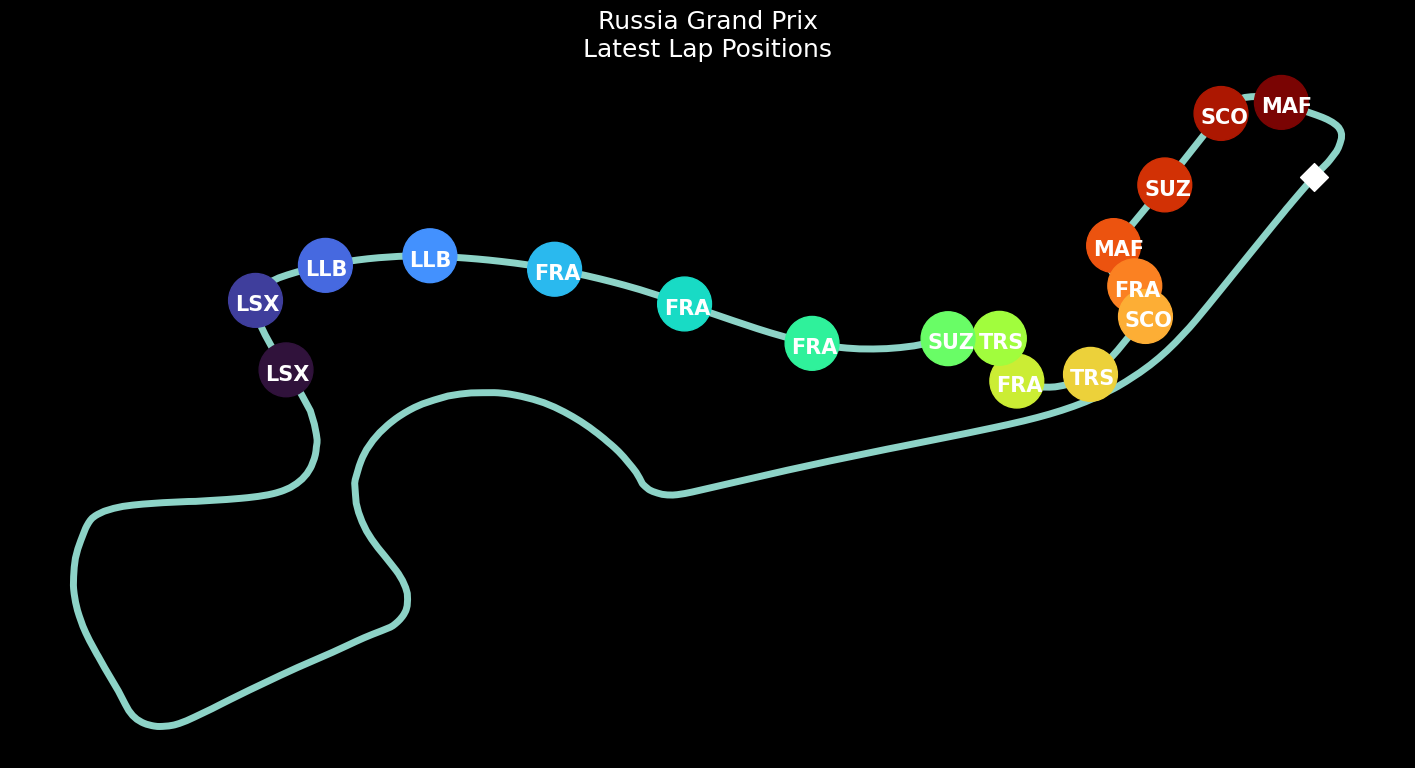

In [22]:
plt.figure(figsize=(18,9))
plt.plot(tel.X, tel.Y, zorder=1, lw=5)


result_x=[]
result_y=[]

t = np.linspace(1,15,len(cars))

# im = plt.imread(dir + 'chequeredFlag.png')
# plt.imshow(im,zorder=1)  

# spaces the cars out around the track
multiplier=-20
# more micro adjustment of car positioning
offset_for_cars=1

# show where the start / finish line is
start_x=[]
start_y=[]
start_x.__iadd__([tel.X.iloc[int(1)]])
start_y.__iadd__([tel.Y.iloc[int(1)]])


for i, row in cars.iterrows():
    # result_x.__iadd__([tel.X.iloc[int(-15*(row[1]+1))]])
    # result_y.__iadd__([tel.Y.iloc[int(-15*(row[1]+1))]])
    result_x.__iadd__([tel.X.iloc[int(multiplier*(row[2]+1))-offset_for_cars]])
    result_y.__iadd__([tel.Y.iloc[int(multiplier*(row[2]+1))-offset_for_cars]])
    

plt.scatter(result_x, result_y, s=1500, c=t, cmap='turbo_r', zorder=2)
font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

for i, row in cars.iterrows():
    # plt.text(tel.X.iloc[int(-15*(row[1]+1))]-250, tel.Y.iloc[int(-15*(row[1]+1))]-200, row[0][:3], c='white')
    plt.text(tel.X.iloc[int(multiplier*(row[2]+1))-offset_for_cars]-300, tel.Y.iloc[int(multiplier*(row[2]+1))-offset_for_cars]-200, row[0][:3], c='white')

plt.scatter(start_x, start_y, marker = 'D', c='white', zorder=2, s=200)
    
# grid(color='r', linestyle='-', linewidth=2)
# plt.scatter(300, -1930, marker = 's', c='white', zorder=2)
# plt.scatter(600, -1930, marker = 's', c='white', zorder=2)
# plt.scatter(460, -2130, marker = 's', c='white', zorder=2)
# plt.scatter(300, -2130, marker = 's', c='black', zorder=2)  
# plt.scatter(460, -1930, marker = 's', c='black', zorder=2)  
# plt.scatter(600, -2130, marker = 's', c='black', zorder=2)  
    
# for i, row in cars.iterrows():
#     plt.scatter(tel.X.iloc[int(-15*(row[1]+1))], tel.Y.iloc[int(-15*(row[1]+1))], s = 1000, c=t, cmap='Oranges', zorder=2)
#     plt.text(tel.X.iloc[int(-15*(row[1]+1))]-200, tel.Y.iloc[int(-15*(row[1]+1))], row[0][:3], c='white')

plt.title('{} Grand Prix\nLatest Lap Positions'.format(GrandPrix))
plt.axis('off')
plt.show()

In [37]:
tel.Y.iloc[-1]

1365

NameError: name 'df_weekly' is not defined